**Assignment 2: Regression and classification**
---
**Group 6:**

Name | Contribution 
--- | ---
1. Himanshu Chuphal (guschuhi@student.gu.se) | 10 H
2. Claudio Aguilar Aguilar(claagu@student.chalmers.se) | 10 H

---

In [13]:
#imported python modules
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns #for residual
from matplotlib.lines import Line2D 
import statistics as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#Import k-nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier

# Question 1
- The dataset associated to this assignment was downloaded from www.hemnet.se on 2020-10-18. The data contains information about selling prices of villas in Landvetter that were sold in the past 12 months.

In [2]:
# read the data file - data_assignment2.csv
url = 'https://raw.githubusercontent.com/hchuphal/dit405/main/a2/data_assignment2.csv'
data = pd.read_csv(url)
#Describe the data
data.describe()
data.columns.tolist()

['ID', 'Living_area', 'Rooms', 'Land_size', 'Biarea', 'Age', 'Selling_price']

**1.a) Find a linear regression model that relates the living area to the selling price. If you did any data cleaning step(s), describe and explain why you did that or describe why it was not necessary.**


Coefficient of Determination: 0.3158


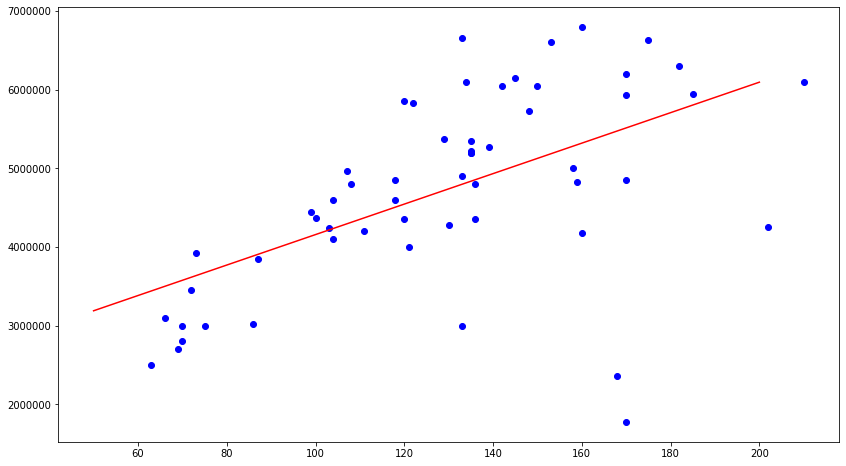

In [3]:
#Plot the data
data_x = data.loc[:, ['Living_area']].values
data_y = data['Selling_price']
#Linear-Regression Model
model = LinearRegression().fit(data_x, data_y) # x, y
r_sq = model.score(data_x, data_y)
print('Coefficient of Determination: {:.4f}'.format(r_sq))
#numpy.linspace() - 500 evenly spaced points b/w 50-210
line_x = np.linspace(50, 200, 500)
line_y = model.predict(line_x[:, np.newaxis])
plt.figure(figsize=(14, 8))
plt.scatter(data_x, data_y, color='blue') #scatter
plt.plot(line_x, line_y, color='red') #regression line
plt.show()

The coefficient of determination (𝑅²) here is 0.32, explains amount of variation in selling_price that can be explained by the dependence on living_area using the linear regression model.

As we can see from the previous plot, there are outliers values (i.e. observed data points), which seems to be far from the least squares line. In other words, have large errors. It needs some cleaning and should not be included in the analysis of the data as outlier maye be a result of erroneous data.

To identity outliers, we decided any data point that is seen further than two standard deviations above or below the regression line to be an outlier. The standard deviation used is the standard deviation of the errors. This provided us few outliers from the dataset:

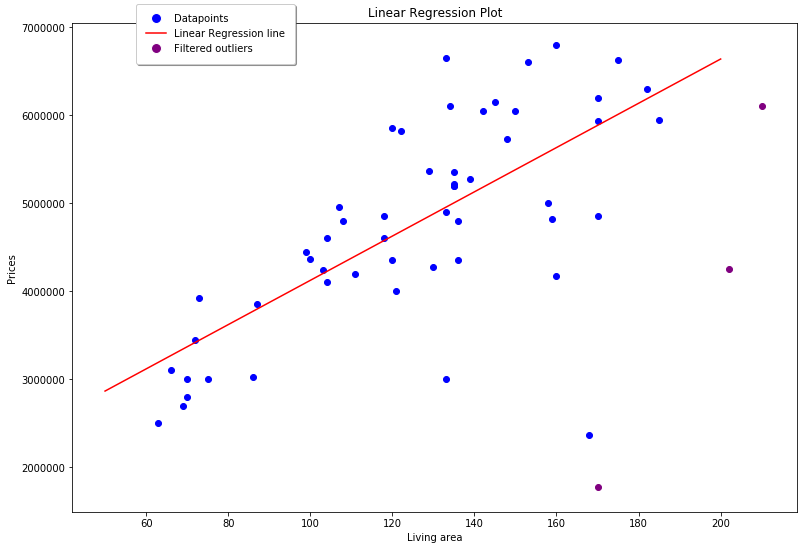

In [4]:
# mean and standard deviation of the data
area_sd = data_x.std()            #living area
area_mean = data_x.mean()
selling_price_sd = data_y.std()   # selling price
selling_price_mean = data_y.mean()
#outliers range for living area and price
#two standard deviations above or below the regression line 
low_area = area_mean - (2 * area_sd)
low_price = selling_price_mean - (2 * selling_price_sd)
high_area = area_mean + (2 * area_sd)
high_price = selling_price_mean + (2 * selling_price_sd)
#outliers Identification step
outliers = data [((data['Living_area'] > high_area) | 
                  (data['Living_area'] < low_area) | 
                  (data['Selling_price'] > high_price) | 
                  (data['Selling_price'] < low_price))]
#filter out df                 
final_data = data [((data['Living_area'] < high_area) &
                  (data['Living_area'] > low_area) &
                  (data['Selling_price'] < high_price) &
                  (data['Selling_price'] > low_price))]
final_x = final_data.loc[:, ['Living_area']].values
final_y = final_data['Selling_price']
#repeating the model again
final_model = LinearRegression().fit(final_x, final_y)
line_x_final = np.linspace(50, 200, 500) #keeping same points as before
line_y_final = final_model.predict(line_x_final[:, np.newaxis])
outliers_area = outliers.loc[:, ['Living_area']]
outliers_price = outliers['Selling_price']
#plt.figure(figsize=(15, 9))
fig, axis = plt.subplots(figsize = (13,9))
#scatter plot first
axis.scatter(final_x, final_y, color='blue')
# regression line
axis.plot(line_x_final, line_y_final, color='red')
#scatter for outliers in purple color
axis.scatter(outliers_area, outliers_price, color='purple')
axis.set_xlabel("Living area")
axis.set_ylabel("Prices")
plt.title('Linear Regression Plot')
#plt.grid(color='gray')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Datapoints',
                          markerfacecolor='blue', markersize=10),
                   Line2D([0],[0],  color='red', label='Linear Regression line'),
                   Line2D([0], [0], marker='o', color='w', label='Filtered outliers',
                          markerfacecolor='purple', markersize=10)]
fig.legend(handles = legend_elements, title='',
           bbox_to_anchor=(0.32,0.851), loc='upper right',
           fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

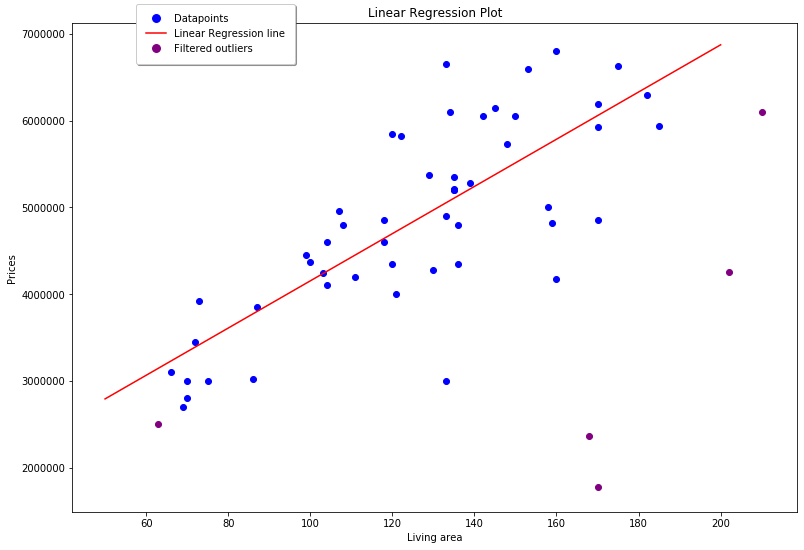

In [5]:
# mean and standard deviation as 1.8 * sd
area_sd = data_x.std()            #living area
area_mean = data_x.mean()
selling_price_sd = data_y.std()   # selling price
selling_price_mean = data_y.mean()
#outliners range for living area and price
low_area = area_mean - (1.8 * area_sd)
low_price = selling_price_mean - (1.8 * selling_price_sd)
high_area = area_mean + (1.8 * area_sd)
high_price = selling_price_mean + (1.8 * selling_price_sd)
outliers = data [((data['Living_area'] > high_area) | 
                  (data['Living_area'] < low_area) | 
                  (data['Selling_price'] > high_price) | 
                  (data['Selling_price'] < low_price))]
#filter out df                 
final_data = data [((data['Living_area'] < high_area) &
                  (data['Living_area'] > low_area) &
                  (data['Selling_price'] < high_price) &
                  (data['Selling_price'] > low_price))]
#outliers Identification step
final_x = final_data.loc[:, ['Living_area']].values
final_y = final_data['Selling_price']
#repeating the model again
final_model_2 = LinearRegression().fit(final_x, final_y)
line_x_final = np.linspace(50, 200, 500) #keeping same points as before
line_y_final = final_model_2.predict(line_x_final[:, np.newaxis])
outliers_area = outliers.loc[:, ['Living_area']]
outliers_price = outliers['Selling_price']
fig, axis = plt.subplots(figsize = (13,9))
#scatter plot first
axis.scatter(final_x, final_y, color='blue')
# regression line
axis.plot(line_x_final, line_y_final, color='red')
#scatter for outliers in purple color
axis.scatter(outliers_area, outliers_price, color='purple')
axis.set_xlabel("Living area")
axis.set_ylabel("Prices")
plt.title('Linear Regression Plot')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Datapoints',
                          markerfacecolor='blue', markersize=10),
                   Line2D([0],[0],  color='red', label='Linear Regression line'),
                   Line2D([0], [0], marker='o', color='w', label='Filtered outliers',
                          markerfacecolor='purple', markersize=10)]
fig.legend(handles = legend_elements, title='',
           bbox_to_anchor=(0.32,0.851), loc='upper right',
           fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

**1.b)	What are the values of the slope and intercept of the regression line?**

- Slope = coeffictient of the linear model
- Intercept = model.intercept_

In [6]:
# print the values
# using the linear model defined in the previous code
print('Slope of the regression line : {:.2f}'.
      format(final_model.coef_[0])) 
print('Intercept: {:.2f}'.
      format(final_model.intercept_))

Slope of the regression line : 25160.26
Intercept: 1606573.82


The value 𝑏₀ = 2220603.24 (approximately) illustrates that the model predicts the selling price as 2220603.24 when 𝑥(living area) is zero. The value 𝑏₁ = 019370.14 means that the predicted response rises by 19370.14 when 𝑥(living area) is increased by 1.

**1.c)	Use this model to predict the selling prices of houses which have living area 100 m2, 150 m2 and 200 m2.**

In [7]:
house_area = [[100], [150], [200]] #m2
# predict(X) : Predict using the linear model
price_predicted = final_model.predict(house_area)
print("Prediction for Living area (100m2) : {:.2f}".
      format(price_predicted[0]))
print("Prediction for Living area (150m2) : {:.2f}".
      format(price_predicted[1]))
print("Prediction for Living area (200m2) : {:.2f}".
      format(price_predicted[2]))

Prediction for Living area (100m2) : 4122600.20
Prediction for Living area (150m2) : 5380613.39
Prediction for Living area (200m2) : 6638626.58


**1.d) Draw a residual plot. (0.75p)**

- We used seaborn.residplot() method to plot the residuals of linear regression. The method regress y on x and then draw a scatter plot of the residuals.

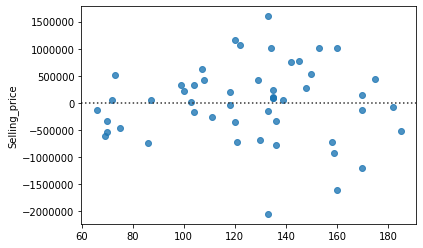

ValueError: exog must be a vector

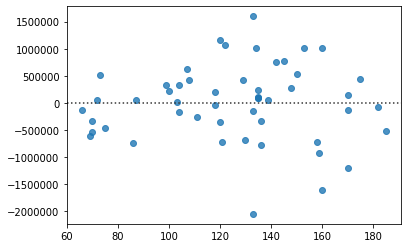

In [8]:
sns.residplot(x=final_x, y=final_y)
plt.show()
sns.residplot(x=final_x, y=final_y, lowess=True, dropna=True)
#lowess: fits a lowess smoother to the residual scatterplot and is optional
#dropna: ignores observations with missing data when fitting and plotting, and is optional
plt.show()



- From the 1st plot, we get a mixture of a balanced but high variance residuals
which kind of indciate that this isn't a bad method. The balanced residual indicate that the method is perfect for given dataset and on the other hand the high variance indicate that we could possibly develop an another method which is more balanced (possibly by using more agressive data-cleaning approach). 
- The 2nd plot fits a lowess smoother to the residual plot, determining if there is a structure to the residuals.

**1.e) Discuss the results, and what changes could be done to create a model with improved performance.**

In [ ]:
# model without any data cleaning
print('Model with original data:')
print('Slope of the regression line : {:.2f}'.
      format(model.coef_[0])) 
print('Intercept: {:.2f}'.
      format(model.intercept_))
r_sq_1 = model.score(data_x, data_y)
print('coefficient of determination: {:.2f}'.format(r_sq_1))
print('Final model after removing the outliers :')
print('Slope of the regression line : {:.4f}'.
      format(final_model.coef_[0])) 
print('Intercept: {:.2f}'.
      format(final_model.intercept_))
r_sq_2 = final_model.score(data_x, data_y)
print('coefficient of determination: {:.4f}'.format(r_sq_2))
# delta
print('Slope delta : {:.2f}'.
      format(model.coef_[0] - final_model.coef_[0]))
print('Intercept delta : {:.2f}'.
      format(model.intercept_ - final_model.intercept_))
print('coefficient of determination delta: {:.4f}'.format(r_sq_1 - r_sq_2))
#regression line - model     
plot1_x = np.linspace(0, 200, 200) 
plot1_y = model.predict(plot1_x[:, np.newaxis])
#regression line - final model  
plot2_x = np.linspace(0, 200, 200) 
plot2_y = final_model.predict(plot2_x[:, np.newaxis])
fig, axis = plt.subplots(figsize=(14, 9))
axis.plot(plot1_x, plot1_y, color='blue')
axis.plot(plot2_x, plot2_y, color='red')
plt.title('Linear Regression Comparison')
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4)]
axis.legend(custom_lines, ['Linear Regression (Original Data) ', 'Linear Regression(Outliers Removed)'])
plt.show()


From 1.a) and after removing the 3 outliers, we get a slightly different regression line. Some difference in the plot from model (with original data points) and final_model (model after removing outliers) :
1. Interception delta is 614029.42  
2. Regression Slope changed by outliers : -5790.13 per m^2 
3. If we look at 1st 100 datapoints, we can say that for smaller living area, there is big difference in the selling prices as compared to when the living area gets close to 100 m^2.
4. Then again as the living area is bigger than 100 m^2, the difference in selling prices increases.
5. Filtering out the 3 outliers did make some difference by using data point that is present further than 2 standard deviations above or below the best-fit line. Such outliers must not be included in the analysis of the data as it can be result of erroneous data. 

We tried to be more agressive in identifying the outliers by selecting a different approach which removed 2 additional data points or we could use 3 standard deviations above or below the best-fit line, which would give a different model (a regression line closer to the actual data points), and would possbly predict the selling price closer to the actual selling price.
However, we need to be careful whilst examining what causes a data point to be an outlier as it might hold some valuable information about the selling price and should remain included in the data. 
5. In 1.c), we predicted the selling price from the identified regression model (final_model) and is based on the learning from 100% of our data point. This means the prediction is based on data that is already known to the model. The accuracy of the regression model could possibly be checked if we could train a model from a different set of data and then use it for predicting the selling price from a different(unkown) set of data.

We made such an attempt for predicting the selling price by splitting the dataset into training set(75%) and test set(25%) and then we can check how good the selling price predictions are for our linear regression model. We can further play around with test size to check predictions for the regression model and also, alternatively we can use a different regression model other than liner regression to improve the performance.


In [ ]:
data_x = data.loc[:, ['Selling_price']].values
data_y = data['Living_area']
#split the dataset into training set(75%) and test set(25%)
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, 
                                                                        data_y,
                                                                        test_size=0.25,
                                                                        random_state=0)
#Linear regression model from training data and plot
model_price = LinearRegression().fit(data_x_train, data_y_train)
max_price = data_x.max()
line_x = np.linspace(0, max_price+2000, 500) # 1000 data points for selling price
line_y = model_price.predict(line_x[:, np.newaxis])
#test data
predict_y_test = model_price.predict(data_x_test)
MSE = metrics.mean_squared_error(data_y_test, predict_y_test)
fig, ax = plt.subplots(figsize=(9, 7))
ax.ticklabel_format(style='plain')
plt.ticklabel_format(useOffset=False)
#scatter plot
plt.scatter(data_x_test, data_y_test, color='blue')
plt.scatter(data_x_test, predict_y_test, color='red')
print('MSE {:.2f}'.format(MSE))
plt.title('Prediction using test data points')
custom_lables = [Line2D([0],[0], marker='o', color='w', label='Actual Price', markerfacecolor='blue'),
                Line2D([0],[0], marker='o', color='w', label='Predicted Price', markerfacecolor='red')]
plt.legend(handles=custom_lables,bbox_to_anchor=(1,0.97),
           title='Selling Price',loc='upper left')
plt.show()

# Question 2
- In this question, you will use the Iris data set (“from sklearn.datasets import load_iris”). [4.5p]

In [10]:
#imported modules for Q2
from sklearn.datasets import load_iris

**2.a) Use a confusion matrix to evaluate the use of decision trees to classify the iris data set. Should you use a train/test set?**

Yes, we should use a train/test set to see how useful(accurate) the classifier will be by see how well it performs when making predictions on new data. We will split the data set into 75% training set and 25% test set since this gave us the best accuracy.



Accuracy: 0.97
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


TypeError: confusion_matrix() got an unexpected keyword argument 'display_labels'

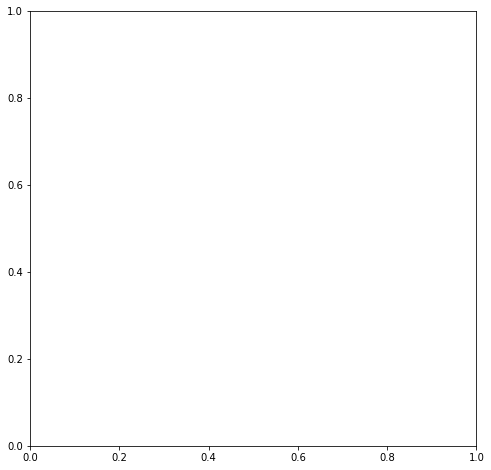

In [11]:
#load data
iris_data= load_iris()
#load data into X and y
X, y = datasets.load_iris(return_X_y = True)
#split the dataset into training set(75%) and test set(25%)
#played with the test_size value, and so far 0.25 gives me the most accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
#Create a decision tree model 
clf = DecisionTreeClassifier(random_state=0)
#train the model
clf.fit(X_train, y_train)
#test the model
#predict the response for test dataset
y_pred = clf.predict(X_test)
#Model accuracy, how often is the classifier correct?
print("Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
#get the labels
iris_labels      = iris_data.target_names
list_iris_labels = list(iris_labels) # convert to list
#Confusion matrix
cmatrix = metrics.confusion_matrix(y_test, y_pred)
print(cmatrix)
#plot confusion matrix
fig, axis = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(clf, X_test, y_test, display_labels=list_iris_labels, cmap=plt.cm.get_cmap('Blues'), ax=axis)
plt.show()
#Size of the feature matrices
print(X_train.shape)
print(X_test.shape)

From the confusion matrix, we can see that one versicolor flower (from the test set) was misclassified as virginica. We can also see from the prints under the confusion matrix that we have 112 data items for training and 38 for testing.

**2.b)	Use k-nearest neighbours to classify the iris data set with some different values for k, and with uniform and distance-based weights. What will happen when k grows larger for the different cases? Why? How about if k gets very large?**

Since we want to test the accuracy for different k-values we will run a loop for all the 112 samples. We run a loop for each weight(uniform and distance) where in uniform based weights all points in each neighborhood are weighted equally and for distance based weights only the closer neighbours of a point will have more influence than neighbors that are further away.

In [ ]:
#list the accurate points
accurate_uniform_values = []
#for loop for uniform values
for k in range(1,112):
  knn_uniform = KNeighborsClassifier(n_neighbors=k, weights= 'uniform', metric='euclidean')
  knn_uniform.fit(X_train, y_train)
  y_pred = knn_uniform.predict(X_test)
  accurate_uniform_values.append(metrics.accuracy_score(y_test,y_pred))
#plot the accuracy for uniform-based weights
plt.figure(figsize=(10,6))
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.title("Nearest Neighbour Classification Accuracy with uniform-based weights")
plt.plot(range(1,112), accurate_uniform_values)
plt.show()

In the case of the **uniform-based** weights the accuracy decreases when k increases. Half of the time the accuracy is pretty good and drops after that. This is because the model has to take more neighbours into consideration(looks at k nearest neighbours), which results in a higher margin of error(less accuracy). When k gets very large it will create a solid line over the data points and take everything into account and not generalise well which will lead to underfitting.



In [ ]:
#list the accurate points
accurate_distance_values = []
#for loop for uniform values
for k in range(1,112):
  knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
  knn_distance.fit(X_train, y_train)
  y_pred = knn_distance.predict(X_test)
  accurate_distance_values.append(metrics.accuracy_score(y_test,y_pred))
#plot the accuracy for distance-based weights
plt.figure(figsize=(10,6))
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.title("Nearest Neighbour Classification Accuracy with distance-based weights")
plt.plot(range(1,112), accurate_distance_values)
plt.show()

In the case of **distance-based** weights, the accuracy pretty much stays the same. The number of neighbours increase but will not have much influence since only the closer neighbors will have a greater influence than the neighbors that are further away. It is less prone to underfitting and could serve as a better choice when deciding for a optimal k value in this case.

In [ ]:
#Initialize figure and axes
fig, ax = plt.subplots(1, figsize=(12,6))
#Set up the title for the figure
fig.suptitle('Nearest Neighbour Classification accuracy')

#Draw lines
ax.plot(range(1,112), accurate_uniform_values, color="red", label="Uniform based weight")
ax.plot(range(1,112), accurate_distance_values, color="green", label="Distance based weight")
#Add legend
plt.legend(loc="lower left", title="", frameon=True)
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()

From this plot, we can see that we have both uniform- and distance-based weights between the k-values 1-48 and from there separate based weights.

**2.c)	Compare the classification models for the iris data set that are generated by k-nearest neighbours (for the different settings from question b) and by decision trees. Compare confusion matrices for these models and discuss the performance of the various models.**

In [ ]:
# DISTANCE
#the decision tree represents the knn method using a k (neighbor) value between 7 and 112.
k=56
#Model accuracy, how often is the classifier correct?
knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
knn_distance.fit(X_train, y_train)
y_pred = knn_distance.predict(X_test)
cmatrix_distance = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy: {:.2f}".format( metrics.accuracy_score(y_test, y_pred)))
#plot confusion matrix
fig, axis = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(knn_distance, X_test, y_test, display_labels=list_iris_labels, cmap=plt.cm.get_cmap('Greens'), ax=axis)
plt.title("Distance-based weight for k=56") # and both uniform- and distance-based weights between k-values 1-48
plt.show()

# UNIFORM
#the decision tree represents the knn method using a k value between 7 and 48.
#as seen in the graph above we have distance and unifrom values from 1 to 48
k=56
#Model accuracy, how often is the classifier correct?
knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
knn_uniform.fit(X_train, y_train)
y_pred = knn_uniform.predict(X_test)
cmatrix_uniform = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy: {:.2f}".format( metrics.accuracy_score(y_test, y_pred)))
#plot confusion matrix
fig, axis = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(knn_uniform, X_test, y_test, display_labels=list_iris_labels, cmap=plt.cm.get_cmap('Reds'), ax=axis)
plt.title("Uniform-based weight with k=56")
plt.show()

#Uniform for k=63
k=63
#Model accuracy, how often is the classifier correct?
knn_uniform_2 = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
knn_uniform_2.fit(X_train, y_train)
y_pred = knn_uniform_2.predict(X_test)
cmatrix_uniform_2 = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy: {:.2f}".format( metrics.accuracy_score(y_test, y_pred)))
#plot confusion matrix
fig, axis = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(knn_uniform_2, X_test, y_test, display_labels=list_iris_labels, cmap=plt.cm.get_cmap('Reds'), ax=axis)
plt.title("Uniform-based weight with k=63")
plt.show()

Since if the k-value is too small then noise will have a greater influence (overfitting). If k is the size of the data set ( too big) then all datapoints will be classified in the same way (underfitting). 

Therefore, we should pick a k-value that is not too big or not too small (a value somewhere in  between to have the best fit as possible). From the plot in b) we can see that the accuracy is pretty good between the k-values 1-48, so we should pick a k-value in that range.

In our comparison we have compared three confusion matrices where the first one(1) is representing the distance-based weight for all the neighbors and the second(2) and third one(3) represents the uniform-based weight for all the neighbors. We are also comparing these against decision tree classifier model in 2.a).

1.   Here we apply distance-based weight for all the neighbors(k=56). The amount of accuracy we get here is 97%.

2.   Here we apply uniform-based weight for all the neighbors(k=56) and get the accuracy of 92%.

3. Here we apply uniform-based weight for all neighbors(k=63) where the accuracy decreases and results in an accuracy of 82%.

Worth mentioning is that both uniform- and distance-based weight is represented between the k-values 1-48, which can be visually seen in the plot from question b).

What we can conclude from this test is that both the decision-tree and k nearest neighbour method works equally just as good for the k-values 1-48 when predicting the correct answer for this particular data set, as it may not do so for another dataset. 

As we mentioned before we should pick a k value between 1-48 which is less than half of the samples(112), since this gives the best accuracy according to the plot in b).

# Question 3

**3.	Explain why it is important to use a separate test (and sometimes validation) set.** 

It is important to divide the dataset into separate sets as i) training set ii) testing set,  so is to train the models on data-points that are previously not known. The training set is used to build the model and the test set is used to evaluate how well the model does with data outside the training set. The model is adjusted to minimize error on the testing set. Another dataset or validation set is used to evaluate the adjusted model where, the validation set data is run against the adjusted model and results compared to the unkown data. 

We have to train the model in predicting data that is unknown. If we do not seperate the dataset, then the model will predict on the same data that is used for both the training set and the test set which will lead to 100% accuracy because the data is known by the model. The downfall with this is when new unknown data comes into the test set the model will not be accurate in predicting it because it has not been trained/learned to handle that. The validation set can then be used to see how well our model has been trained.
